In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X, y = load('../../data.joblib')
y.unique()

array([0, 1], dtype=int64)

In [3]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.000000,0.00000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.891594,0.00000,0.0,0.0,0.0,1.000,1.0,0.800,0.6,0.007500,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.548717,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434425,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999829,0.03125,0.0,0.0,0.0,1.000,1.0,0.384,0.0,0.229375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X.isna().any().any()

False

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [6]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [8]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn = build_model(knn, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[42911  5121]
 [ 5441 44437]]
Accuracy score:  0.8921254213052804
Precision score:  0.8966665321441544
Recall score:  0.8909138297445768
F1 score:  0.8937809244136933

--------------------------------------

Test data:

Confusion matrix: 
 [[ 9812  2152]
 [ 2285 10229]]
Accuracy score:  0.8187351907835607
Precision score:  0.8261852839027543
Recall score:  0.8174045069522136
F1 score:  0.8217714400482025


In [12]:
import math
math.ceil(math.sqrt(X_train.shape[0]))

313

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [25, 50, 100, 200, 300],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [14]:
estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=3)

In [15]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [25, 50, 100, 200, 300], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [16]:
estimator.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

In [17]:
estimator.best_score_

0.8169135120771958

In [18]:
estimator = build_model(estimator, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47932   100]
 [  197 49681]]
Accuracy score:  0.9969666019814115
Precision score:  0.9979912014624054
Recall score:  0.9960503628854405
F1 score:  0.9970198376463741

--------------------------------------

Test data:

Confusion matrix: 
 [[10156  1808]
 [ 2105 10409]]
Accuracy score:  0.8401421684778169
Precision score:  0.852009494966031
Recall score:  0.8317883969953652
F1 score:  0.8417775261817153


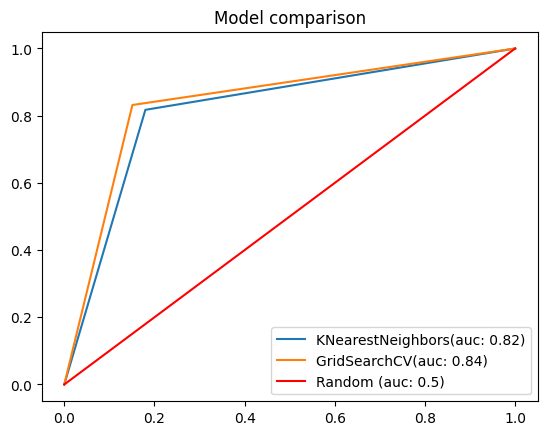

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, estimator.best_estimator_]
model_names = ['KNearestNeighbors', 'GridSearchCV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()

In [22]:
from joblib import dump

In [25]:
dump(models, 'knn.joblib')

['knn.joblib']